In [1]:
# 必要なパッケージを呼び出す
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# MATLABではグローバル変数を使って関数への変数受け渡しを行う
# Julia/Pythonではコンストラクタを用いる

# ギリシャ文字の使用は不可とする
class Model:

    def __init__(self,alpha,beta,delta,gamma,Abar,gbar,kss,css,Rss,T):

        # カリブレーション
        self.alpha = alpha 
        self.beta = beta           
        self.delta = delta 
        self.gamma = gamma
        self.Abar = Abar
        self.gbar = gbar

        # 定常状態の値
        self.kss = kss
        self.css = css    
        self.Rss = Rss
    
        # 移行過程に関する変数
        self.T = T

In [3]:
# カリブレーション
alpha = 0.33
beta = 0.95
delta = 0.2
gamma = 2.0
Abar = 1.0
gbar = 0.2

# 定常状態の値
kss = (alpha*beta*Abar/(1-beta*(1-delta)))**(1/(1-alpha))
css = kss**alpha - delta*kss - gbar
Rss = 1 - delta + alpha*Abar*kss**(alpha-1)

# 移行過程に関する変数
T = 100

# k の初期値
k0 = kss

#### 将来の消費増税の影響 (transition2_tauc.m に対応)

In [4]:
m = Model(alpha,beta,delta,gamma,Abar,gbar,kss,css,Rss,T);

# imaginary states
kvec0 = np.linspace(k0,m.kss,m.T)
kvec1 = np.copy(kvec0)

tauc = np.zeros(m.T)
tauc[9:m.T] = 0.2

cvec = np.zeros(m.T)
kvec = np.zeros(m.T)
rvec = np.zeros(m.T)
Rvec = np.zeros(m.T)

damp = 0.9
diff = 1e+4
crit = 1e-4
iter = 0

while diff > crit:

    rvec = m.alpha * m.Abar * kvec0**(m.alpha-1)
    wvec = (1-m.alpha) * m.Abar * kvec0**m.alpha

    cvec[m.T-1] = m.css
    for i in reversed(range(m.T-1)):
        cvec[i] = (1/m.beta/(1+rvec[i+1]-m.delta)*(1+tauc[i+1])/(1+tauc[i])*(cvec[i+1]**m.gamma))**(1/m.gamma)
    
    kvec[0] = k0
    for j in range(m.T-1):
        kvec[j+1] = rvec[j]*kvec0[j] + wvec[j] + (1-m.delta)*kvec[j] - m.gbar - cvec[j]; # k1,k2,...,kT
    
    # update
    kvec1 = damp*kvec0 + (1-damp)*kvec

    diff = np.max(np.abs(kvec1-kvec0))
    kvec0 = np.copy(kvec1)
    iter += 1

    # use the terminal condition as the criterion
    print([iter,diff])


for t in range(m.T-1):
    Rvec[t] = ((1+tauc[t])/(1+tauc[t+1])) * (1-m.delta + m.alpha*m.Abar*kvec[t+1]**(m.alpha-1))


[1, 0.026552395087058756]
[2, 0.02295020416861604]
[3, 0.019645817883924277]
[4, 0.01664710543663328]
[5, 0.01395399825084831]
[6, 0.011559950984300515]
[7, 0.00945329008467155]
[8, 0.00761843956183883]
[9, 0.006037016521917904]
[10, 0.004688792382248952]
[11, 0.00355251925861233]
[12, 0.0026066244737463773]
[13, 0.0018579989923481754]
[14, 0.0019439688711178071]
[15, 0.001954611886738178]
[16, 0.0019321276480097627]
[17, 0.0018818422555335612]
[18, 0.001789316979506017]
[19, 0.0016675421063980789]
[20, 0.0015434517146064586]
[21, 0.001420492099510673]
[22, 0.0012874799735846931]
[23, 0.0011506433683974304]
[24, 0.0010148100057545406]
[25, 0.0008912568424652711]
[26, 0.0007819481310211707]
[27, 0.0006778409037149213]
[28, 0.0005806323425339155]
[29, 0.0004914044807220463]
[30, 0.00041074247583772205]
[31, 0.00033883863971984063]
[32, 0.0002755826899092373]
[33, 0.00022388023559427594]
[34, 0.00018081707957229298]
[35, 0.0001437372309016638]
[36, 0.00011222145471023737]
[37, 8.578679207

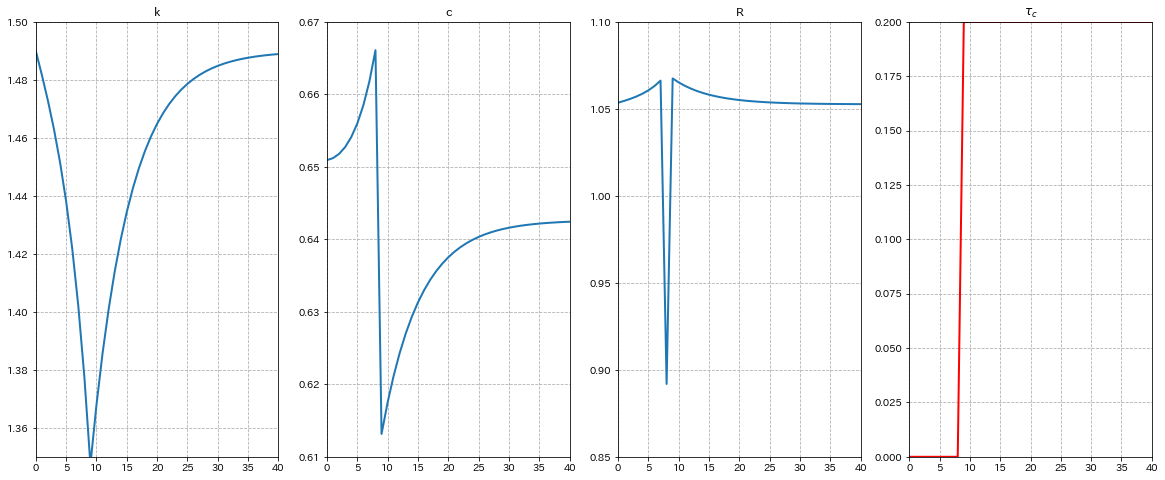

In [5]:
fig, ax = plt.subplots(1,4,figsize=(20,8))
ax[0].plot(kvec,lw=2)
ax[1].plot(cvec,lw=2)
ax[2].plot(Rvec[0:m.T-1],lw=2)
ax[3].plot(tauc,c="r",lw=2)

ax[0].set(title="k",xlim=(0,40),ylim=(1.35,1.5))
ax[1].set(title="c",xlim=(0,40),ylim=(0.61,0.67))
ax[2].set(title="R",xlim=(0,40),ylim=(0.85,1.1))
ax[3].set(title=r"$\tau_{c}$",xlim=(0,40),ylim=(0,0.2))

for i in range(4):
    ax[i].grid(ls="--")

plt.show()